Opgave 1:
laver kkdata til 2d array og finder antallet af "native" og ikke "native" engelsk talene borgere

In [28]:
import module1

module1.find_native_and_non_native_english_speakers()

(5088, 575207)

In [29]:
data = module1.get_data_arr()

mask_swedish = data[:,3] == 5120
mask_year = data[:,0] == 1999

#Find Swedes
arr1 = module1.mask_certain_data(data, mask_swedish)

#Find dataf for year 1999
arr2 = module1.mask_certain_data(data, mask_year)

print("Swedes:\n"+str(arr1) + "\n\nYear 1999:\n" + str(arr2))

Swedes:
[[2015    1    0 5120    4]
 [2015    1    1 5120    4]
 [2015    1    2 5120    3]
 ...
 [1992   99   53 5120    1]
 [1992   99   54 5120    1]
 [1992   99   55 5120    1]]

Year 1999:
[[1999    1    0 5100  543]
 [1999    1    0 5103    1]
 [1999    1    0 5104    1]
 ...
 [1999   99   86 5100    1]
 [1999   99   94 5100    1]
 [1999   99  100 5100    1]]


### Illustration 1

<IPython.core.display.Javascript object>


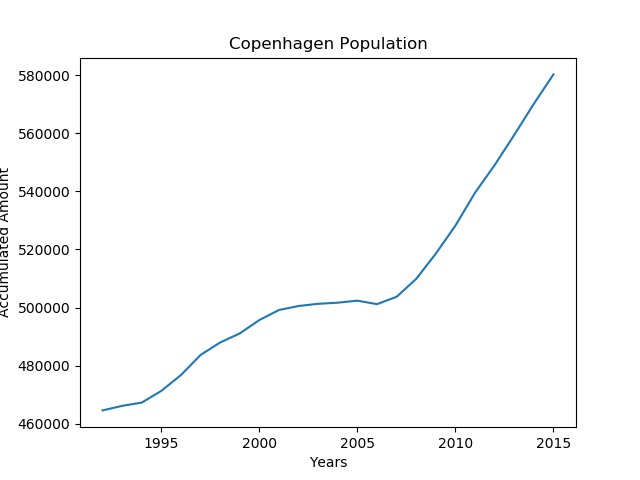

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt

years = data[:, 0]
years_list = list(set(years))

population_list = []

for i in years_list:
    mask_population = data[:, 0] == i
    population_list.append(module1.accum_val_from_filter(data, mask_population))
    
plt.plot(years_list, population_list)
plt.ylabel("Accumulated Amount")
plt.xlabel("Years")
plt.title("Copenhagen Population")
plt.show()

### Illustration 2

<IPython.core.display.Javascript object>


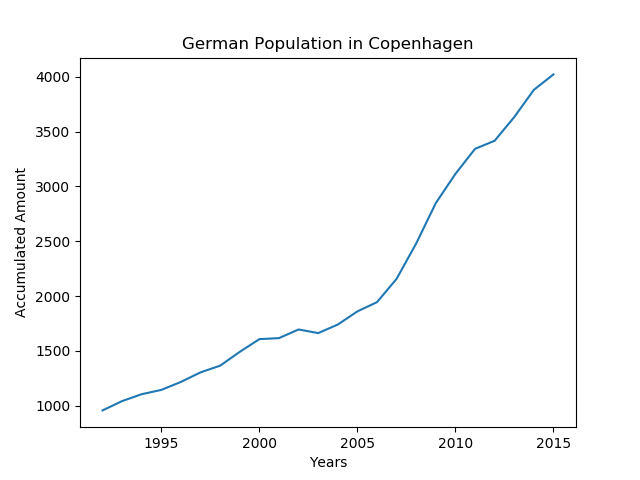

In [49]:
%matplotlib notebook
import matplotlib.pyplot as plt2

german_mask = data[:, 3] == 5180

#Find germans
germans = module1.mask_certain_data(data, german_mask)

german_population_list = []

for i in years_list:
    mask_population = (germans[:, 0] == i)
    german_population_list.append(module1.accum_val_from_filter(germans, mask_population))
    
plt2.plot(years_list, german_population_list)
plt2.ylabel("Accumulated Amount")
plt2.xlabel("Years")
plt2.title("German Population in Copenhagen")
plt2.show()

### Illustration 3

<IPython.core.display.Javascript object>


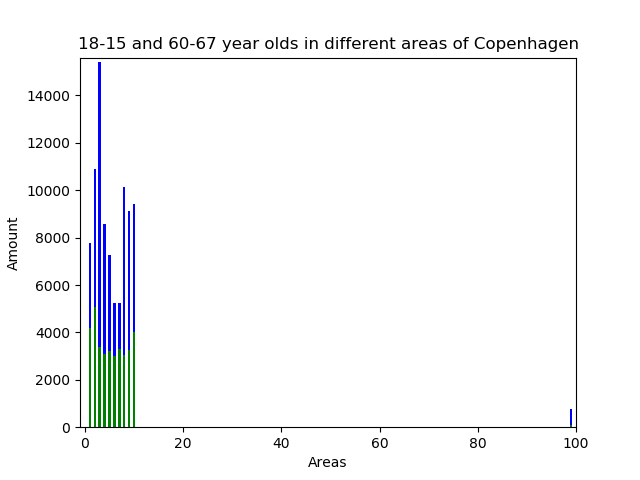

Text(0.5, 1.0, '18-15 and 60-67 year olds in different areas of Copenhagen')

In [69]:
%matplotlib notebook
import matplotlib.pyplot as plt3

age_mask_young = ((data[:, 2] >= 18) & (data[:, 2] <= 25) & (data[:,0] == 2015))
age_mask_old = ((data[:, 2] >= 60) & (data[:, 2] <= 67) & (data[:,0] == 2015))

areas = data[:, 1]
areas_list = list(set(areas))

young_data = module1.mask_certain_data(data, age_mask_young)
old_data = module1.mask_certain_data(data, age_mask_old)

young_population_list = []
old_population_list = []

for i in areas_list:
    mask_population = (young_data[:, 1] == i)
    young_population_list.append(module1.accum_val_from_filter(young_data, mask_population))
    
for i in areas_list:
    mask_population = (old_data[:, 1] == i)
    old_population_list.append(module1.accum_val_from_filter(old_data, mask_population))

plt3.bar(areas_list, young_population_list, width=0.5, align='center', color="blue")
plt3.bar(areas_list, old_population_list, width=0.5, align='center', color="green")
plt3.axis([-1, max(areas_list) + 1, 0, max(young_population_list) + 200])
plt3.xlabel("Areas", fontsize=10)
plt3.ylabel("Amount", fontsize=10)
plt3.title("18-15 and 60-67 year olds in different areas of Copenhagen")

### Illustration 4 - Østerbro

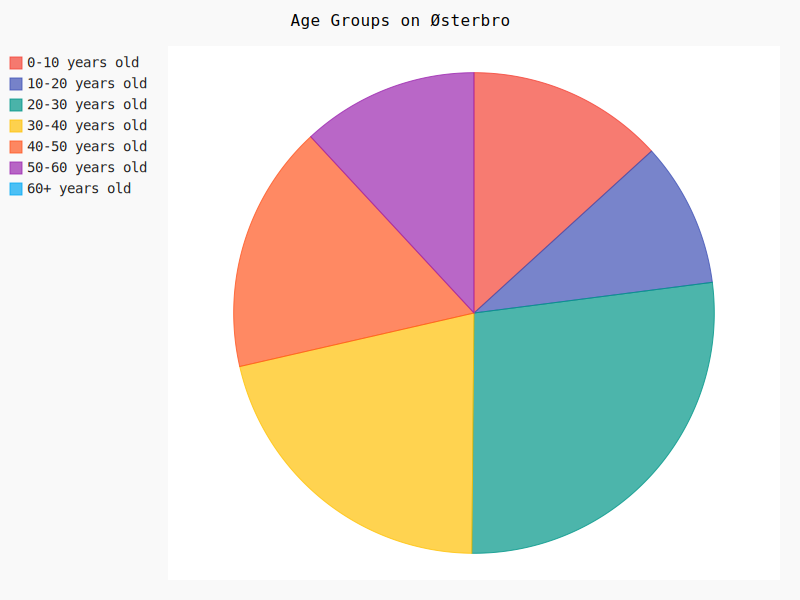

In [101]:
import pygal
from IPython.display import SVG, display

zero_ten = ((data[:, 2] >= 0) & (data[:, 2] < 10) & (data[:,0] == 2015) & (data[:,1] == 2))
ten_twenty = ((data[:, 2] >= 10) & (data[:, 2] < 20) & (data[:,0] == 2015) & (data[:,1] == 2))
twenty_thirty = ((data[:, 2] >= 20) & (data[:, 2] < 30) & (data[:,0] == 2015) & (data[:,1] == 2))
thirty_forty = ((data[:, 2] >= 30) & (data[:, 2] < 40) & (data[:,0] == 2015) & (data[:,1] == 2))
forty_fifty = ((data[:, 2] >= 40) & (data[:, 2] < 50) & (data[:,0] == 2015) & (data[:,1] == 2))
fifty_sixty = ((data[:, 2] >= 50) & (data[:, 2] < 60) & (data[:,0] == 2015) & (data[:,1] == 2))
sixty_plus = ((data[:, 2] >= 60) & (data[:,0] == 2015) & (data[:,2] == 2))

results = [
    ("0-10 years old", module1.accum_val_from_filter(data, zero_ten)),
    ("10-20 years old", module1.accum_val_from_filter(data, ten_twenty)),
    ("20-30 years old", module1.accum_val_from_filter(data, twenty_thirty)),
    ("30-40 years old", module1.accum_val_from_filter(data, thirty_forty)),
    ("40-50 years old", module1.accum_val_from_filter(data, forty_fifty)),
    ("50-60 years old", module1.accum_val_from_filter(data, fifty_sixty)),
    ("60+ years old", module1.accum_val_from_filter(data, sixty_plus))
]

pie_chart = pygal.Pie()
pie_chart.title = 'Age Groups on Østerbro'
for r in results:
    pie_chart.add(r[0], r[1])

display(SVG(pie_chart.render(disable_xml_declaration=True)))

### Illustration 4 - Vesterbro

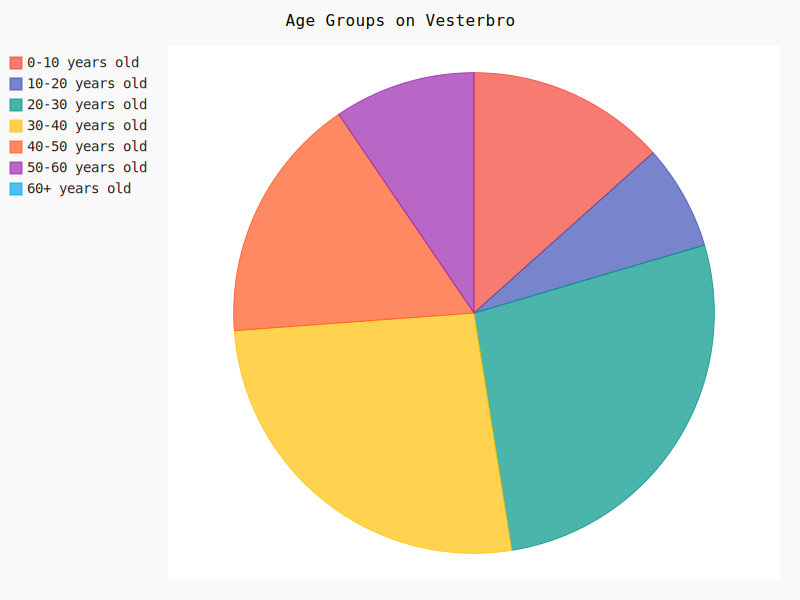

In [102]:
import pygal
from IPython.display import SVG, display

zero_ten = ((data[:, 2] >= 0) & (data[:, 2] < 10) & (data[:,0] == 2015) & (data[:,1] == 4))
ten_twenty = ((data[:, 2] >= 10) & (data[:, 2] < 20) & (data[:,0] == 2015) & (data[:,1] == 4))
twenty_thirty = ((data[:, 2] >= 20) & (data[:, 2] < 30) & (data[:,0] == 2015) & (data[:,1] == 4))
thirty_forty = ((data[:, 2] >= 30) & (data[:, 2] < 40) & (data[:,0] == 2015) & (data[:,1] == 4))
forty_fifty = ((data[:, 2] >= 40) & (data[:, 2] < 50) & (data[:,0] == 2015) & (data[:,1] == 4))
fifty_sixty = ((data[:, 2] >= 50) & (data[:, 2] < 60) & (data[:,0] == 2015) & (data[:,1] == 4))
sixty_plus = ((data[:, 2] >= 60) & (data[:,0] == 2015) & (data[:,2] == 4))

results2 = [
    ("0-10 years old", module1.accum_val_from_filter(data, zero_ten)),
    ("10-20 years old", module1.accum_val_from_filter(data, ten_twenty)),
    ("20-30 years old", module1.accum_val_from_filter(data, twenty_thirty)),
    ("30-40 years old", module1.accum_val_from_filter(data, thirty_forty)),
    ("40-50 years old", module1.accum_val_from_filter(data, forty_fifty)),
    ("50-60 years old", module1.accum_val_from_filter(data, fifty_sixty)),
    ("60+ years old", module1.accum_val_from_filter(data, sixty_plus))
]

pie_chart2 = pygal.Pie()
pie_chart2.title = 'Age Groups on Vesterbro'
for r in results2:
    pie_chart2.add(r[0], r[1])

display(SVG(pie_chart2.render(disable_xml_declaration=True)))